(a) (a < feature1 < b) AND (c < feature2 < d) :
a = 6.026296259216194
b = 6.998079203533234
c = 0.8335293241420705
d = 2.096388054631785

(b) (feature1 - a)^2 + (feature2 - b)^2 = r^2 :
a = 6.534277706375207
b = 1.4990416859683662
r = 0.5283724831686845


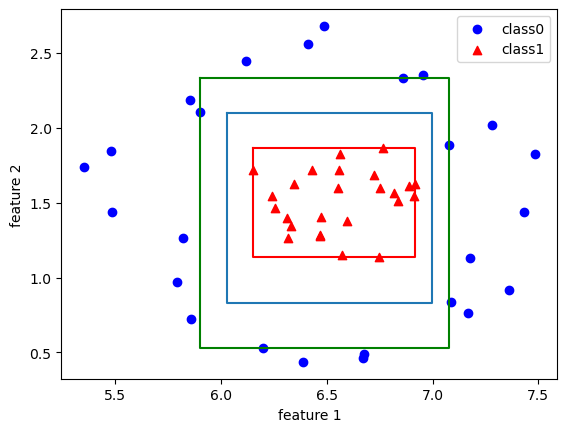

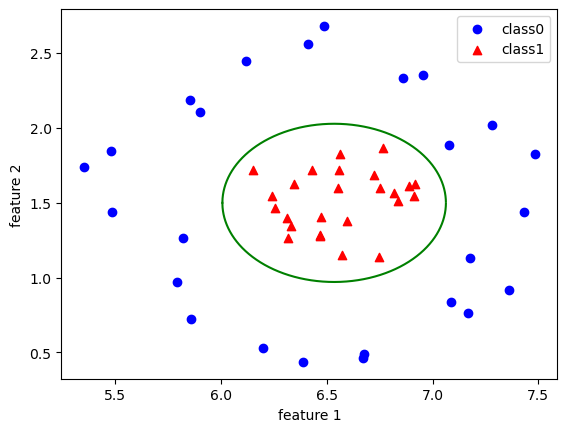

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv("hw2_data1.csv")

class shape:
    def __init__(self):    # constructor
        self.right  = 0
        self.left   = 0
        self.top    = 0
        self.bottom = 0
        
plt.figure()
plt.scatter(data1.iloc[(data1.iloc[:,2] == 0).values, 0],
            data1.iloc[(data1.iloc[:,2] == 0).values, 1], 
            c='b', marker='o', label='class0') # outer
plt.scatter(data1.iloc[(data1.iloc[:,2] == 1).values, 0],
            data1.iloc[(data1.iloc[:,2] == 1).values, 1], 
            c='r', marker='^', label='class1') # inner
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# get class 0 & class 1
class0 = data1.iloc[(data1.iloc[:,2] == 0).values, :] 
class1 = data1.iloc[(data1.iloc[:,2] == 1).values, :] 

# feature 1 : x-axis 0
# feature 2 : y-axis 1

S  = shape()
G  = shape()
G1 = shape()
G2 = shape()
C  = shape()

# get class1 top / bottom / right / left
S.right  = max(class1.iloc[:,0])
S.left   = min(class1.iloc[:,0])
S.top    = max(class1.iloc[:,1])
S.bottom = min(class1.iloc[:,1])

# plot specific hypothesis
S_x = [S.left, S.right, S.right, S.left, S.left]
S_y = [S.top, S.top, S.bottom, S.bottom, S.top]
plt.plot(S_x, S_y, "r")

# get G1
rights, lefts, tops, bottoms = [], [], [], []

for index, row in class0.iterrows():
    if S.left <= row["feature 1"] <= S.right:
        if row["feature 2"] > S.top:
            tops.append(row["feature 2"])
        elif row["feature 2"] < S.bottom:
            bottoms.append(row["feature 2"])

G1.top    = min(tops)
G1.bottom = max(bottoms)

for index, row in class0.iterrows():
    if G1.bottom <= row["feature 2"] <= G1.top:
        if row["feature 1"] > S.right:
            rights.append(row["feature 1"])
        elif row["feature 1"] < S.left:
            lefts.append(row["feature 1"])

G1.right = min(rights)
G1.left  = max(lefts)
    
# get G2
rights, lefts, tops, bottoms = [], [], [], []

for index, row in class0.iterrows():
    if S.bottom <= row["feature 2"] <= S.top:
        if row["feature 1"] > S.right:
            rights.append(row["feature 1"])
        elif row["feature 1"] < S.left:
            lefts.append(row["feature 1"])

G2.right = min(rights)
G2.left  = max(lefts)

for index, row in class0.iterrows():
    if G2.left <= row["feature 1"] <= G2.right:
        if row["feature 2"] > S.top:
            tops.append(row["feature 2"])
        elif row["feature 2"] < S.bottom:
            bottoms.append(row["feature 2"])

G2.top    = min(tops)
G2.bottom = max(bottoms)

Area1 = (G1.right - G1.left) * (G1.top - G1.bottom)
Area2 = (G2.right - G2.left) * (G2.top - G2.bottom)

# takes the larger area one
if Area1 > Area2:
    G = G1
else:
    G = G2

G_x = [G.left, G.right, G.right, G.left, G.left]
G_y = [G.top, G.top, G.bottom, G.bottom, G.top]
plt.plot(G_x, G_y, "g")

C.right  = (G.right + S.right)/2
C.left   = (G.left + S.left)/2
C.top    = (G.top + S.top)/2
C.bottom = (G.bottom + S.bottom)/2

C_x = [C.left, C.right, C.right, C.left, C.left]
C_y = [C.top, C.top, C.bottom, C.bottom, C.top]
plt.plot(C_x, C_y)
plt.legend()

# print("The most specific hypothesis, S:")
# print(f"Right  : {S.right}\nLeft   : {S.left}\nTop    : {S.top}\nBottom : {S.bottom}\n")
# print("The most general hypothesis, G:")
# print(f"Right  : {G.right}\nLeft   : {G.left}\nTop    : {G.top}\nBottom : {G.bottom}")

print("(a) (a < feature1 < b) AND (c < feature2 < d) :")
print(f"a = {C.left}\nb = {C.right}\nc = {C.bottom}\nd = {C.top}\n")
# (b)

a = (S.right + S.left)/2
b = (S.top + S.bottom)/2
r = (((S.right - S.left)**2 + (S.top - S.bottom)**2)**(0.5))/2

plt.figure()
plt.scatter(data1.iloc[(data1.iloc[:,2] == 0).values, 0],
            data1.iloc[(data1.iloc[:,2] == 0).values, 1], 
            c='b', marker='o', label='class0') # outer
plt.scatter(data1.iloc[(data1.iloc[:,2] == 1).values, 0],
            data1.iloc[(data1.iloc[:,2] == 1).values, 1], 
            c='r', marker='^', label='class1') # inner
plt.xlabel('feature 1')
plt.ylabel('feature 2')

xc = np.arange(a-r, a+r, 0.0001)
yc = (abs(r**2 - (xc-a)**2))**0.5 + b
yc2 = -yc + 2*b

plt.plot(xc,yc,color='g')  # top half 
plt.plot(xc,yc2,color='g') # bottom half
plt.legend()

print("(b) (feature1 - a)^2 + (feature2 - b)^2 = r^2 :")
print(f"a = {a}\nb = {b}\nr = {r}")